### CS986FoMLDAGroup7
Bhaskar Sinha(202359293),  Eitika Sharma(202352860), Akshay Shiwarkar(202387178), Abu Hurairah(202383800), Salman Tahir(202356526)

## Introduction
The exercise undertaken by our team aims to build a machine learning model which predicts the genre of a song. Since genre is a categorical value, we will employ a classification method. Nonetheless, before diving deeper we need to look at the big picture,get, clean, discover and visualize data for insights. Following this, we will prepare the data for our classification algorithm, select and train the model and would ultimately fine-tune it for accuracy. Lastly, we will present our findings and compare with our performance in Kaggle InClass competition. A prime focus of our analysis would be to provide justification for any tool or method we employ.

### Getting the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

C:\Users\sinha\AppData\Local\Temp\ipykernel_5772\1326395329.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


After importing the necessary libraries we read the classification datasets (test and train) to start our expedition.

In [2]:
df_class_train = pd.read_csv("CS98XClassificationTrain.csv")
df_class_test = pd.read_csv("CS98XClassificationTest.csv")

### Data Cleaning

We start with cleaning the training dataset by checking for null values and dropping those.

In [3]:
df_class_train.shape

(453, 15)

An initial assessment reveals that the train Dataset has dimensions of 453 rows × 15 columns

In [4]:
df_class_train.isnull().sum()

Id            0
title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

Next we look for null values and found 15 in the column **"top genre"**. This is quite insignificant compared to the rest of the dataset so these values can be removed. Hence, we have dropped the NULL values and reset the index.

In [5]:
df_class_train = df_class_train.dropna().reset_index(drop=True)

#### Genre

In [6]:
df_class_train["top genre"].value_counts()

top genre
adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: count, Length: 86, dtype: int64

Ultimately we proceed to analyze **genre** which is the center of attraction of this exercise and discover that there are 86 unique genres of music in this dataset.

In [7]:
df_genre = df_class_train['top genre'].value_counts()[:5]
df_genre

top genre
adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
Name: count, dtype: int64

Advancing further we track down the top 5 genres in which **adult standards** tops the chart, followed by **album rock** and **dance pop**. Glam rock and brill building pop equally takes the forth spot.

### Feature Distribution
#### Histograms

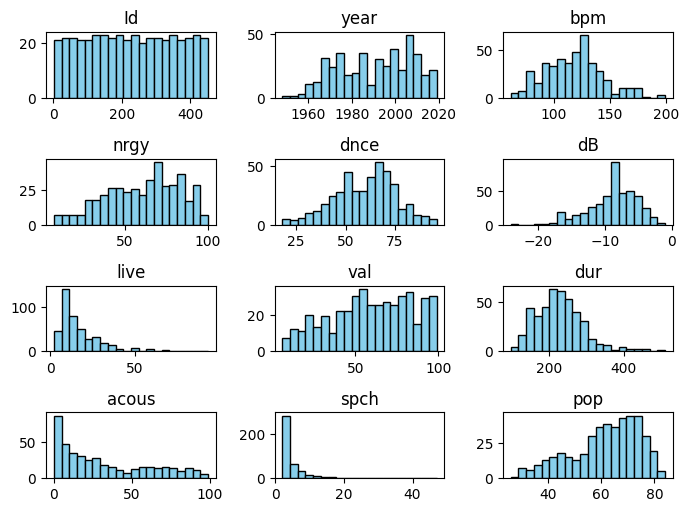

In [8]:
df_class_train.hist(bins=20, figsize=(7, 5.5), color='skyblue', edgecolor='black', grid=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Finally to get a holistic overview of all the features we plot the relevant histograms and can see some conclusions like:
- the year attribute reveals a fairly even distribution of songs, with a slight peak in mid 1980s and after 2000s. This means that the dataset has songs from different eras.
- A big chunk of the songs have beats per minute between approx 65 and 130 which signifies pop music. There are fewer genres that are very slow or very fast. 
- An even spreadout with slight peaks can be seen in the energy levels of songs which signals that there is a mix of low and high energy songs
- Most of the songs have danceability score ranging from over 40 to 80, suggesting that they are adequately danceable. Very fewer songs range in the category of very or not danceable at all.
- In the loudness of songs too we can see a mix of loud and quiet songs.
- Likewise the valuence of songs which is entirely positive suggests presence of upbeat and happy songs.
- The duration of songs suggest that many songs have a medium term duration, not too short and for sure not too long.
- Similar trends can be seen in other features especially **spch** and **pop**. Spch reveals that most of the songs has low speechiness and hence there's more singing rather than spoken words whereas pop shows a rather fairly even spread out signifying presence of unpopular and poular songs.



#### Boxplots
Now we move on to detecting outliers through boxplots. The same could have been done through histograms too but the latter are more suited towards ascertaining data distribution, dispersion, skewness and bimodality, as we discussed in the previous section.

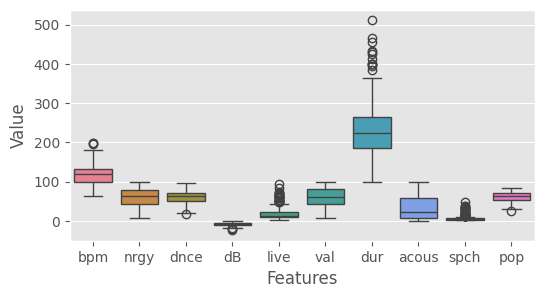

In [9]:
style.use('ggplot')
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_class_train.drop(['Id','title', 'artist', 'top genre', 'year'], axis=1))
plt.xlabel('Features'); plt.ylabel('Value'); plt.show()

It is clear that the distribution in the "dB" and "spch" features is too minute for comparison with others, we will remove these from the plot. 

### OUTLIERS
The histograms we earlier revealed showed skewness in **dur, live, spch** and this could be due to outliers. Therefore we are Z - score to correct this anomaly if we find any.
#### Z - score
Any Z-score greater than 3 or less than -3 is considered to be an outlier. We can see presence of outliers alternatively through boxplots too as is shown above.

Hence to remove outliers we are only keeping the ones that are within +3 to -3, standard deviations is performed.

In [10]:
df = df_class_train

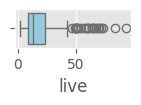

In [11]:
# live
df_class_train= df_class_train[np.abs(df_class_train.live-df_class_train.live.mean()) <= (3*df_class_train.live.std())]
plt.figure(figsize=(1.5, 0.5)) 
sns.boxplot(x=df['live'], color='skyblue')
plt.show()

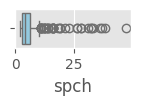

In [12]:
# spch
df_class_train= df_class_train[np.abs(df_class_train.spch-df_class_train.spch.mean()) <= (3*df_class_train.spch.std())]
plt.figure(figsize=(1.5, 0.5)) 
sns.boxplot(x=df['spch'], color='skyblue')
plt.show()

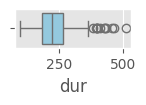

In [13]:
# dur
df_class_train= df_class_train[np.abs(df_class_train.dur-df_class_train.dur.mean()) <= (3*df_class_train.dur.std())]
plt.figure(figsize=(1.5, 0.5)) 
sns.boxplot(x=df['dur'], color='skyblue')
plt.show()

Due to the exercise we see fewer outliers but let's assess the situation by forming histograms again.    

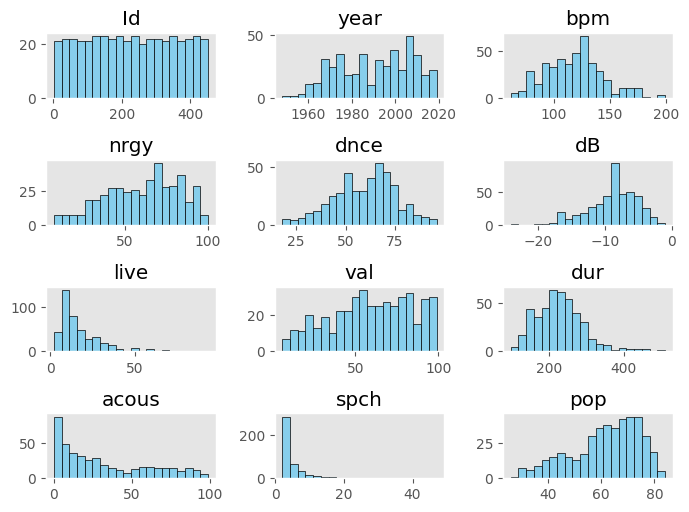

In [14]:
df.hist(bins=20, figsize=(7, 5.5), color='skyblue', edgecolor='black', grid=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Correlation

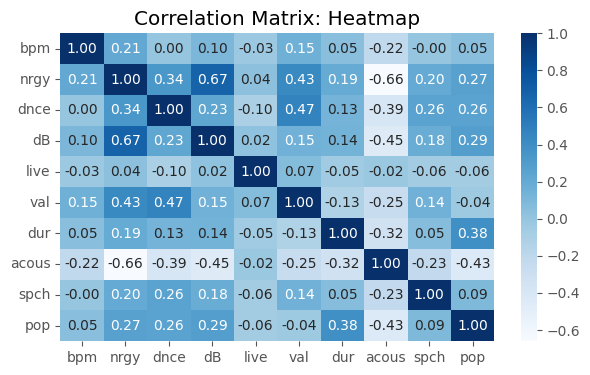

In [15]:
df_class_numeric = df_class_train.drop(['Id','title','year' ,'artist', 'top genre'], axis=1)
correlation_matrix = df_class_numeric.corr() 
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix: Heatmap')
plt.show()

The correlation analysis through a heapmap shows correlations between the variables where red indicate a positive correlation, blue indicate negative and white no correlation. From our data we find some interesting observations:

- dB and nrgy have a high positive correlation signals towards the fact that the more energetic the song is, the easier it is to dance on.
- similar trends can be seen in val and nrgy which means that more energetic the song the more positive will be the mood for the song. Likewise in case of dnce and val we can conclude that the more positive the mood for the song is for the singer, people tend to dance more easily on that song.
- On the contrary, we have a interesting finding where acous and energy have a high negative correlation of -0.66. Is our dataset signifying that if a song is more acoustic, the less energetic will it be?
- This can also be seen in the case of acous and dB but here the correlation measure is relatively less than earlier with a value of -0.45. Also, pop and acous is no different. All these hint towards the idea that the more acoustic the song the less energetic, less loud and less popular it will be. 


After training we move on to our **Test dataset**

In [16]:
df_class_test.shape

(113, 14)

The dataset has dimensions of: 113 rows × 14 columns

There are 14 columns/features as opposed to 15 in train dataset: 
- Id, title, artist, year, bpm, nrgy, dnce, dB, live, val, dur, acous, spch, pop

There are no missing values in the df_class_test dataset, when df_class_test.isnull().sum() is run.

### Feature Distribution

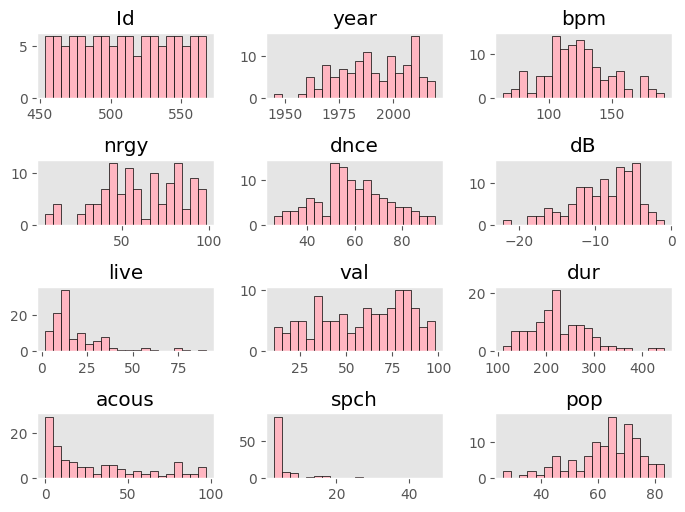

In [17]:
df_class_test.hist(bins=20, figsize=(7, 5.5), color='lightpink', edgecolor='black', grid=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The interpretation of the test data histograms is similar to train dataset as both follow almost identical distribution so we won't provide the same analysis again. Following this, we would map unique  unique artist names to numerical indices using enumerate to proceed our analysis.

In [18]:
unique_artists = df_class_train['artist'].unique()
artist_mapping = {artist: i for i, artist in enumerate(unique_artists)}
default_artist_value = len(unique_artists)  

After this we apply the mapping to train and test datasets and report the findings below:

In [19]:
df_class_train['artist_encoded'] = df_class_train['artist'].map(artist_mapping).astype(int)
df_class_test['artist_encoded'] = df_class_test['artist'].map(artist_mapping).fillna(default_artist_value).astype(int)

In [20]:
df_class_train.head(1)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre,artist_encoded
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards,0


## CLASSIFICATION

Finally we move to classification, the core motivate of this analysis.

### Validation Set

In [21]:
train, test = train_test_split(df_class_train, test_size = 0.2, random_state=53)
print("Training size: {}; Test size {}.".format(len(train), len(test)))

Training size: 326; Test size 82.


The training set has been split into a training size 326, and test size of 82.

#### Feature Selection

The dataset encompasses features such as 'year,' 'bpm,' 'nrgy,' 'dnce,' 'dB,' 'acous,' 'pop,' and 'artist_encoded.' Utilizing a Decision Tree Classifier involves establishing a criterion for the minimum sample split and defining the features to be employed during the classifier's training. Subsequently, this classifier is trained on a dataset, enabling it to make predictions based on the specified features.

In [22]:
c= DecisionTreeClassifier(min_samples_split=100) 
features = ['year','bpm','nrgy','dnce','dB','acous','pop','artist_encoded']

In [23]:
X_train = train[features]
y_train = train['top genre']
X_test = test[features]
y_test = test['top genre']

features = ['year','bpm','nrgy','dnce','dB','acous','pop','artist_encoded'] of test is the passed to X_test_cts.

In [24]:
X_test_cts = df_class_test[features]

In [25]:
dt = c.fit(X_train, y_train)

In [26]:
y_pred_train = c.predict(X_test)

In [27]:
y_pred = c.predict(X_test_cts)

In [28]:
score = accuracy_score(y_test, y_pred_train)*100

In [29]:
print('Accuracy of Decision Tree: ', round(score,2),"%")

Accuracy of Decision Tree:  29.27 %


### Ensemble Classification
The following are types of ensemble classification methods and we aim to use these in our analysis:
1. **Random Forest Classifier**: RFC involves fitting multiple decision tree classifiers on various sub-samples of the dataset, thereby averaging predictions to improve accuracy and avoid overfitting.
2. **Voting Classifier**: This method combines multiple machine learning models to make predictions by a majority vote or by averaging their predicted probabilities.
3. **LogisticRegression**: A linear classification method for binary and multiclass classifications, which estimate the probability that a given instance belongs to a particular class.
4. **SVC (Support Vector Classifier)**: This method finds a hyperplane in an N-dimensional space to separate data into classes, aiming to maximize the margin between classes.

In [30]:
log_clf = LogisticRegression(solver='saga',max_iter=10000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 solver='saga')),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

As we can see above we used an ensemble classifier using **Voting Classifier** which consists of logistic regression, random forest classifier and support vector machine and results in **voting_clf** which is used to make predictions on new data and combines the three base classifiers using a majority voting to arrive at a final conclusion. 
**Rationale for using this**: As opposed to individual classifiers an ensemble classifier leads to better generalizations and performance and hence has more validity. 
Next, we will dig deeper in this arena by looking at the accuracy score of the classifications used.

**Accuracy Score of All Classifications used**

In [31]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.3048780487804878
RandomForestClassifier 0.3902439024390244
SVC 0.15853658536585366
VotingClassifier 0.2804878048780488


Looking at the accuracy results we see that logistic regression has accuracy of 30%, random forest 39%, SVC 8.54% and voting classifier 28.04% and hence random forest bade better but when voting classifier combines all the three classifiers the result is 25.61% and as a rule of thumb the more the better is preferred. Nonetheless, accuracy alone might not provide a complete picture of a model's performance, specifically if there is any class imbalance or more factors which could have been considered. Hence to better assess specific goals and features of a dataset, metrics like soft voting, precision, recall or F1 score might help in this regard. We might not have considered all such aspects and hence can be regarded as limitation of our analysis.

#### Soft Voting
Earlier we used **hard voting** which refers to a classifier that makes decisions based on majority clas label predicted by the individual classifiers but on the contrary **soft voting** provides a better solution. Soft voting could potentially improve the performance of our ensemble classifier as it takes into account probability estimates of each classifier and then combines them in a weighted average to make decisions. It is useful when confidence of the classifiers varies, just like in our case and gives hope for improved accuracy and reliability.

In [32]:
svm_clf = SVC(probability=True)
VotingClassifier(estimators=[('lr', LogisticRegression()),('rf', RandomForestClassifier()), ('svc', SVC())], voting='soft')

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())],
                 voting='soft')

In [33]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, ypred))

LogisticRegression 0.3048780487804878
RandomForestClassifier 0.3780487804878049
SVC 0.15853658536585366
VotingClassifier 0.3170731707317073


As opposed to our expectations even soft voting did not make any contribution in improving the accuracy. There was some variation, though not in our favour, like RF decreased from 39% to 37.8%, although the overall voting classifier still had an accuracy measure of 31.7%
With this limitation in our analysis we proceed to our final model selection and would conclude afterwards.

### FINAL MODEL SELECTION
#### Random Forest Classification

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=25, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
ypred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.36585365853658536


Since RF better predicted our target classification we used this in our final model as this is the better approach for us. We conclude that approximately 36.5% of the instances in our test set were correctly classified by the random forest model. As discussed earlier accuracy alone might not give a complete picture but the exercise was aimed at classification and other metrics were beyond the purview of our analysis and hence is our limitation.

In [35]:
df_class_X = df_class_test.drop(['Id', 'title', 'artist', 'val','dur','live'] , axis =1)
df_class_X.head(1)

,year,bpm,nrgy,dnce,dB,acous,spch,pop,artist_encoded
0,2005,154,93,65,-3,1,18,72,51


Based on our analysis and our RF classification we have dropped the columns namely **Id, title, artist, val, dur, and live** and come up with the above 9 columns and conclude that genre of a song is best predicted by the year it was released in, its bpm, nrgy, dnce, dB, acous, spch, pop and artist_encoded.
The exercise with all its limitation attempted to build a machine learning model which predicted the genre of a song. We cleaned our data initially to remove null values and read and understood our data well through exploratory data analysis- correlation, boxplots, histograms etc. and finally employed a classification model. Initially we used hard voting to see if the majority rule would work and then a soft voting to see weighted average probabilities but the model accuracy did not shoot as we had expected. Finally, since Random Forest seemed more promising among the results we chose it as our final model and predicted that the 9 mentioned features predict genre of a song.

## Conclusion: Comparison with Kaggle Inclass Competition Results

In [36]:
org_id  =  df_class_test['Id']  # Extracted Id from Test dataset

In [37]:
ypred = rnd_clf.predict(X_test_cts)

In [38]:
fin_dft = pd.DataFrame({'Id': org_id, 'top genre': ypred})  #Now, we merged Id and the predicted top genre(ypred)

In [39]:
#This is our final predicted output csv file.
fin_dft.to_csv('Predicted_Top_Genre.csv', index =False)

We have concluded that hard voting was ineffective in defining our classification model, prompting a shift to soft voting. However, this adjustment failed to yield a significant increase in accuracy too. Consequently, we opted for the random forest method, which indicated that 9 features are sufficient to predict the genre of a song.

Our random forest model achieved a score of 39% on the training dataset. In the Kaggle Competition, our model attained a score of 42.8%, placing us at 25th rank. Despite significant improvements through numerous iterations, we acknowledge that our performance could have been enhanced further with additional tools. Regrettably, due to constraints, we were constrained to utilize the techniques taught in our machine learning class.